In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

In [5]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [6]:
stock = 'GOOG'
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [8]:
google_data.shape

(5006, 6)

In [9]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5.006000e+03
mean,44.872628,45.347077,44.427114,44.899296,44.849134,1.160245e+08
std,42.800972,43.278319,42.390531,42.851207,42.805325,1.499152e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.004382,13.137507,12.864281,13.011853,12.997063,2.744850e+07
50%,26.960986,27.158207,26.762000,26.964719,26.934070,5.659735e+07
75%,59.957874,60.446876,59.516499,60.113626,60.045297,1.429900e+08
max,191.750000,192.860001,190.619995,191.960007,191.960007,1.650833e+09


In [10]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5006 entries, 2004-08-19 to 2024-07-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5006 non-null   float64
 1   High       5006 non-null   float64
 2   Low        5006 non-null   float64
 3   Close      5006 non-null   float64
 4   Adj Close  5006 non-null   float64
 5   Volume     5006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 273.8 KB


In [11]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

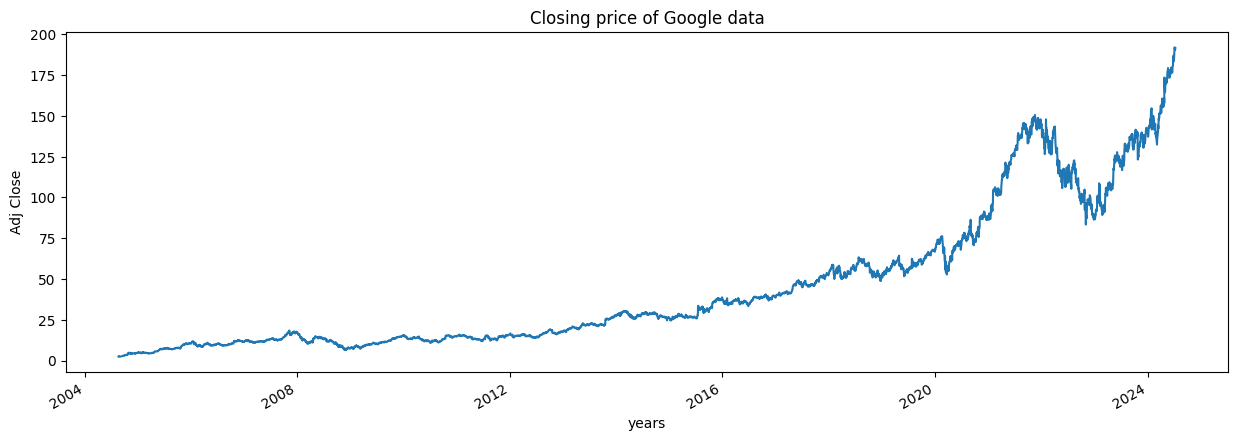

In [13]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [14]:
def plot_graph(figsize, values, column_name ):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [15]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

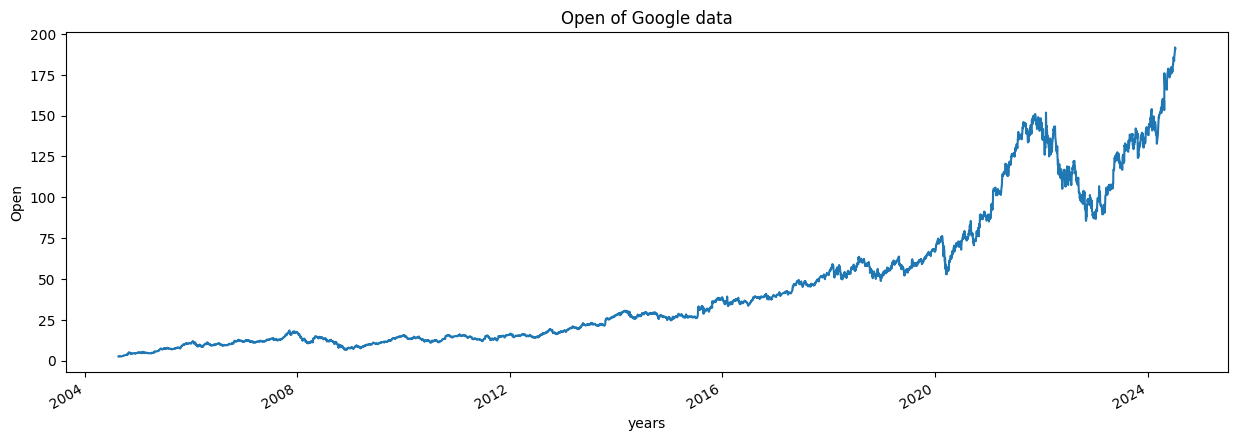

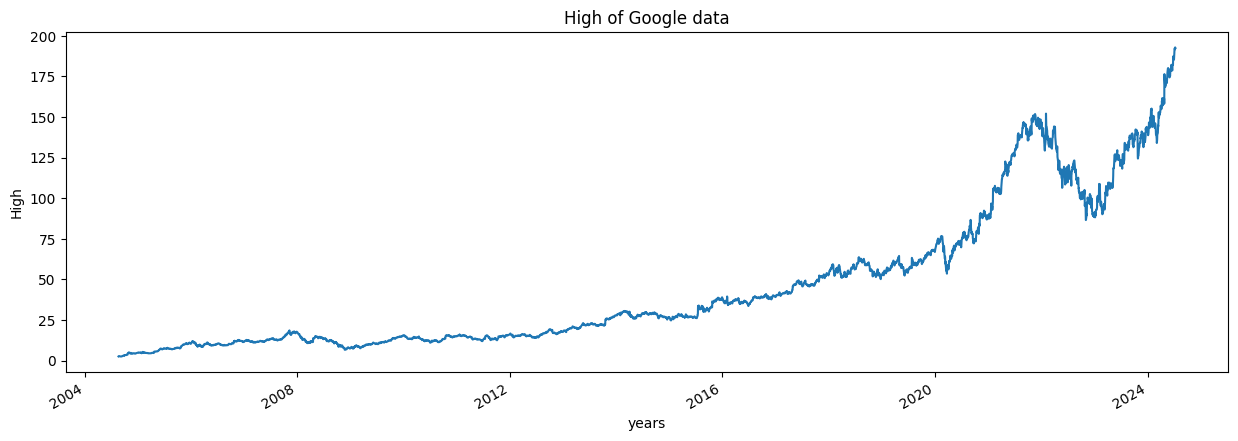

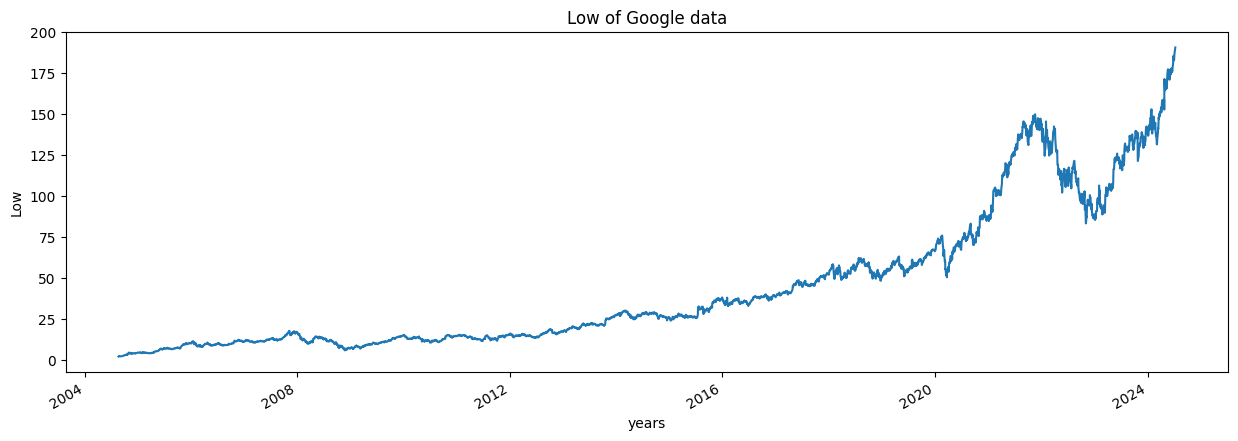

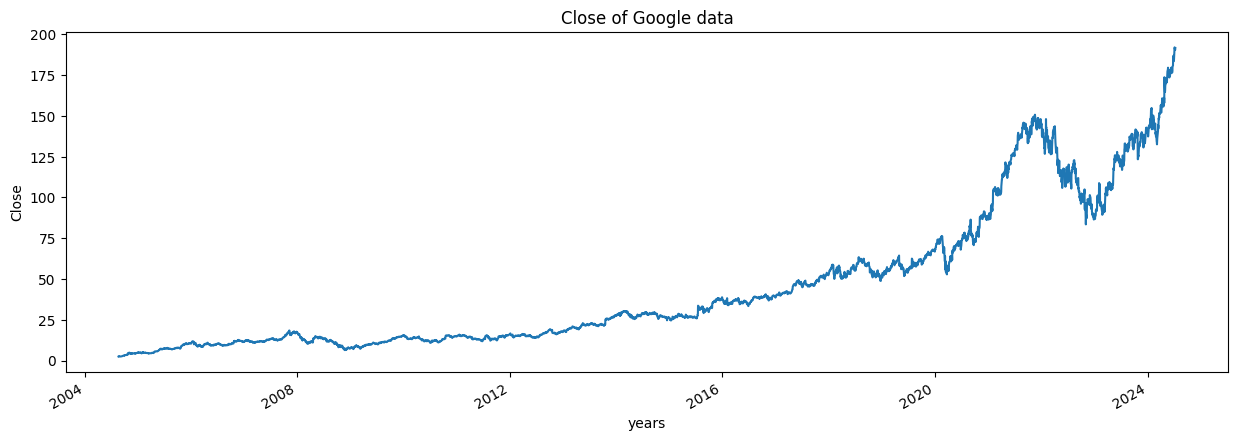

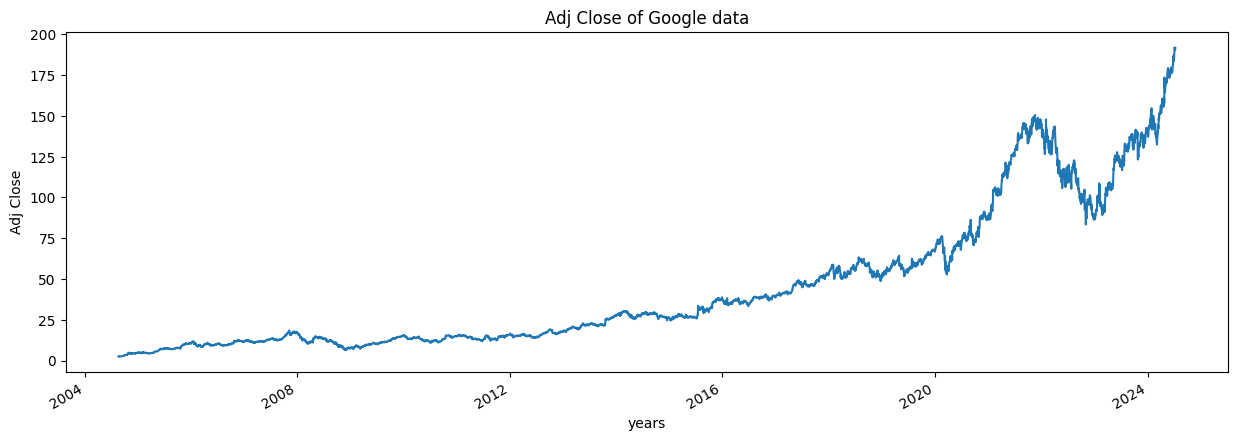

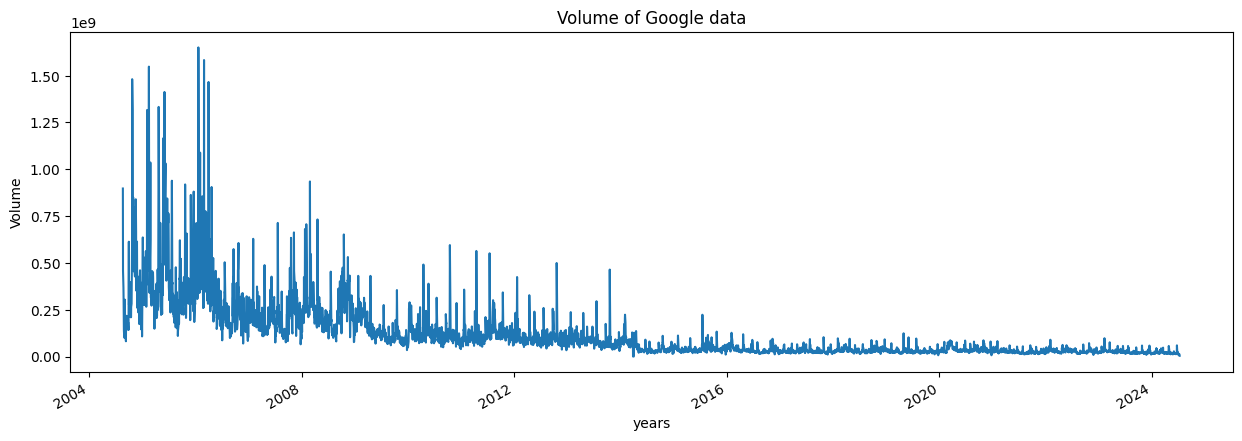

In [16]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i, list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 131


In [21]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [22]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

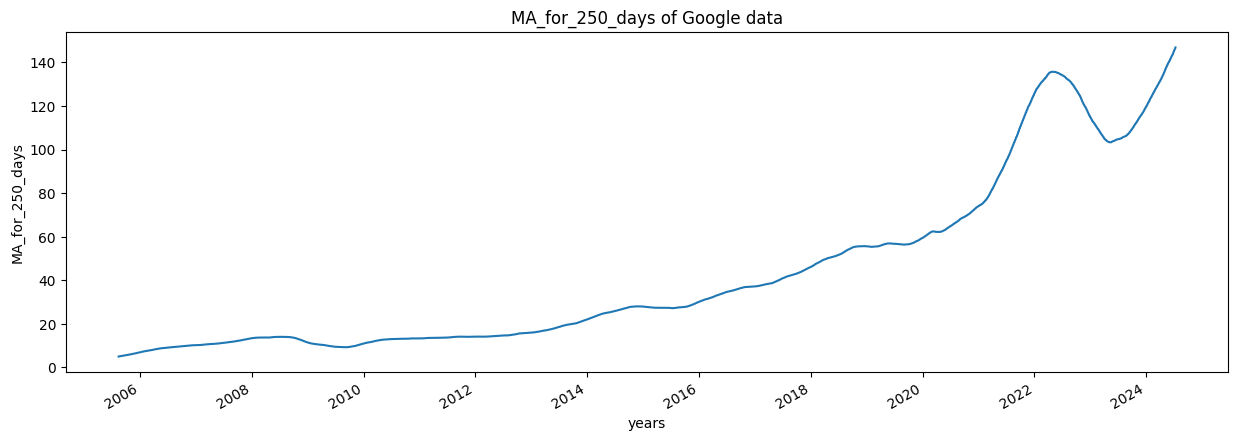

In [23]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

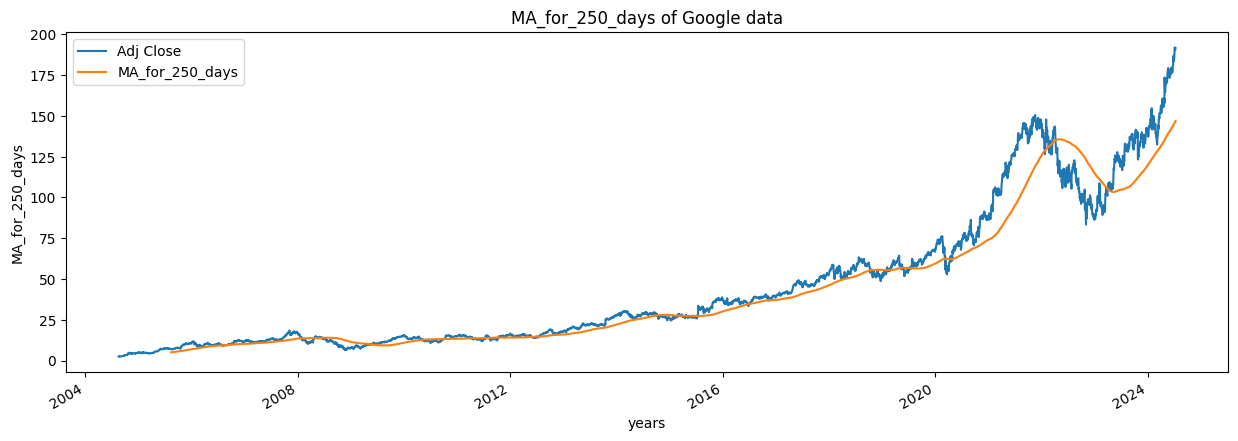

In [24]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

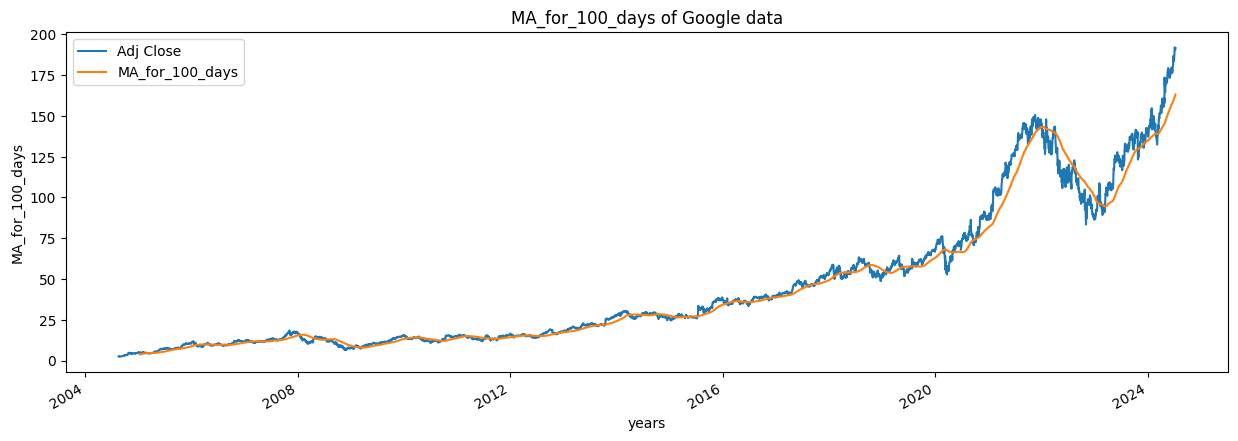

In [25]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

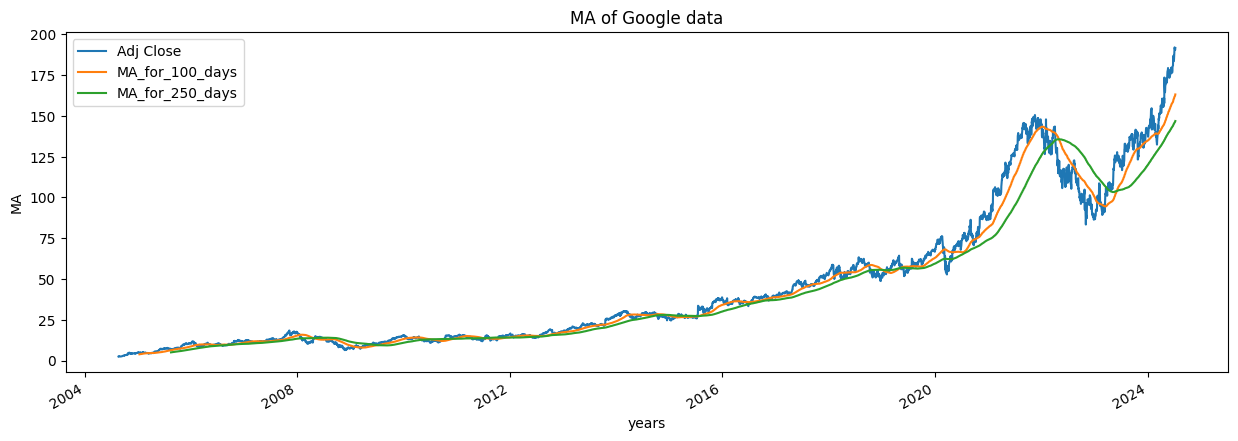

In [26]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

In [27]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


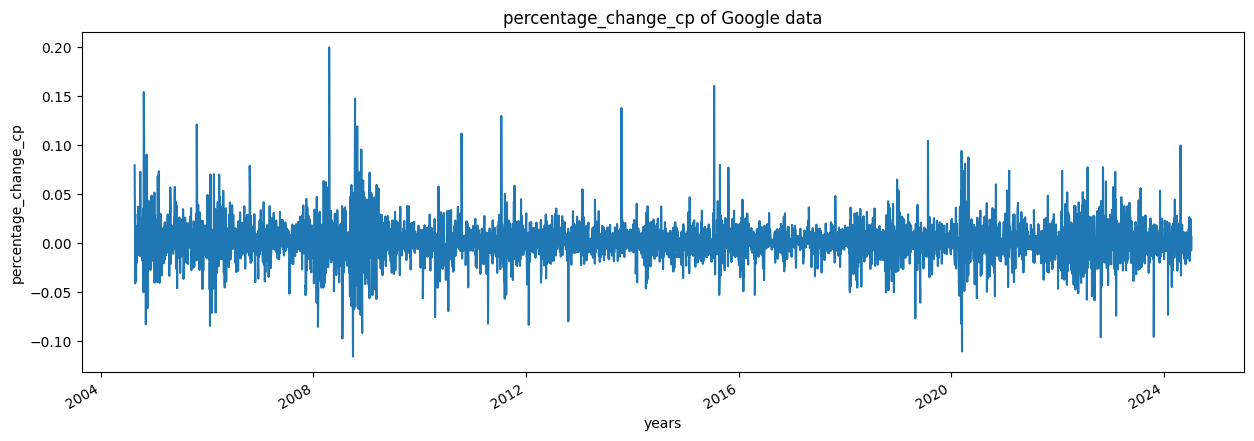

In [28]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

In [29]:
Adj_close_price = google_data[['Adj Close']]

In [30]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([191.96000671]), array([2.48808169]))

In [31]:
from sklearn.preprocessing import MinMaxScaler 

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.33344361e-05],
       [1.08982370e-03],
       [1.23294386e-03],
       ...,
       [9.92188758e-01],
       [9.91977681e-01],
       [9.98205478e-01]])

In [33]:
len(scaled_data)

5006

In [34]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [35]:
x_data[0],y_data[0]

(array([[4.33344361e-05],
        [1.08982370e-03],
        [1.23294386e-03],
        [6.38137888e-04],
        [7.86509068e-04],
        [1.03730092e-03],
        [8.06204480e-04],
        [2.62610105e-04],
        [3.09878087e-04],
        [3.15149240e-05],
        [1.96955377e-04],
        [0.00000000e+00],
        [2.06148750e-04],
        [3.00689747e-04],
        [3.02000929e-04],
        [6.98537822e-04],
        [9.83464445e-04],
        [1.50736844e-03],
        [1.57433183e-03],
        [1.83299833e-03],
        [2.29518995e-03],
        [2.54072575e-03],
        [2.34114423e-03],
        [2.41204495e-03],
        [2.73243136e-03],
        [2.60243812e-03],
        [2.39629440e-03],
        [3.52550263e-03],
        [4.07960408e-03],
        [3.88527358e-03],
        [4.27655946e-03],
        [4.60218934e-03],
        [5.03680462e-03],
        [4.86742559e-03],
        [5.09982943e-03],
        [4.95277195e-03],
        [4.62845325e-03],
        [4.90944255e-03],
        [5.3

In [36]:
int(len(x_data)*0.7)

3434

In [37]:
4990-100-int(len(x_data)*0.7)

1456

In [38]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3434, 100, 1)
(3434, 1)
(1472, 100, 1)
(1472, 1)


In [40]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [41]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
model.fit(x_train,y_train, batch_size=1, epochs = 4)

Epoch 1/4
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 121s 35ms/step - loss: 1.9777e-04
Epoch 2/4
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 116s 34ms/step - loss: 3.9243e-05
Epoch 3/4
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 112s 32ms/step - loss: 3.8100e-05
Epoch 4/4
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 115s 33ms/step - loss: 4.0163e-05


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
predictions = model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


In [46]:
predictions

array([[0.3113473 ],
       [0.30612803],
       [0.30106428],
       ...,
       [0.9592853 ],
       [0.94940794],
       [0.94907   ]], dtype=float32)

In [47]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 61.479656],
       [ 60.49075 ],
       [ 59.531315],
       ...,
       [184.24573 ],
       [182.37424 ],
       [182.3102  ]], dtype=float32)

In [48]:
y_test

array([[0.30797273],
       [0.30238722],
       [0.29961424],
       ...,
       [0.99218876],
       [0.99197768],
       [0.99820548]])

In [49]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 60.84026718],
       [ 59.78197098],
       [ 59.25656891],
       ...,
       [190.47999573],
       [190.44000244],
       [191.61999512]])

In [50]:
rmse = np.sqrt(np.mean((inv_predictions-inv_y_test)**2))

In [51]:
rmse

3.013445920807209

In [52]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1),
    } ,
        index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,Original_test_data,predictions
Date,,
2018-08-31,60.840267,61.479656
2018-09-04,59.781971,60.490749
2018-09-05,59.256569,59.531315
2018-09-06,58.505421,59.096687
2018-09-07,58.175301,58.441410


<Figure size 640x480 with 0 Axes>

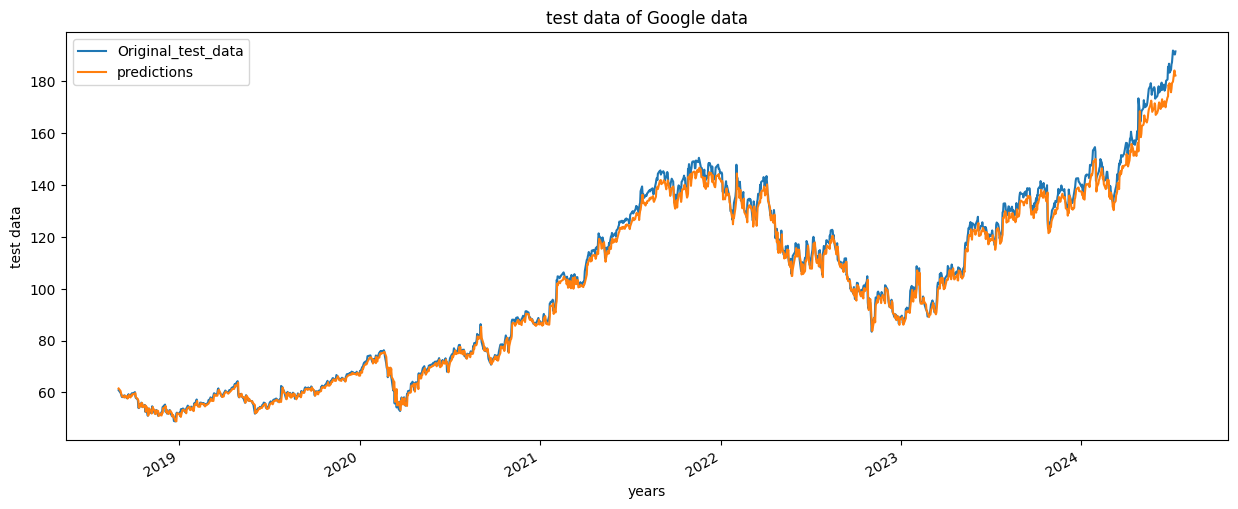

In [53]:
plot_graph((15,6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

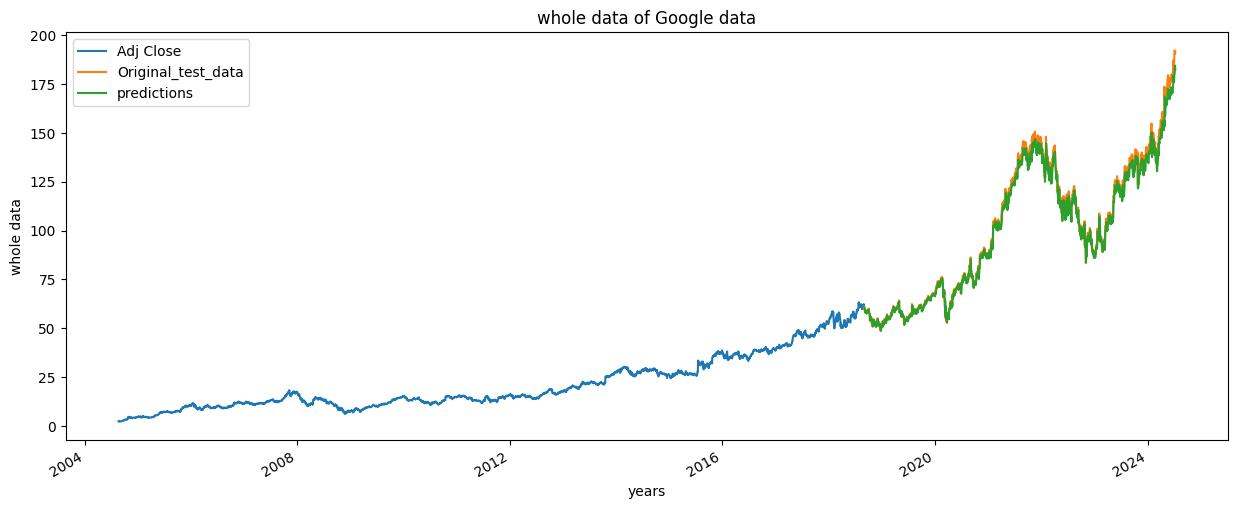

In [54]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100], plotting_data], axis=0), 'whole data')

In [55]:
last_100 = google_data[['Adj Close']].tail(100) 
last_100.tail()

,Adj Close
Date,
2024-07-03,187.389999
2024-07-05,191.960007
2024-07-08,190.479996
2024-07-09,190.440002
2024-07-10,191.619995


In [56]:
last_100 = scaler.fit_transform(last_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100


array([[[0.19088076],
        [0.15431466],
        [0.16169491],
        [0.18920321],
        [0.21402798],
        [0.21352449],
        [0.10382698],
        [0.12647122],
        [0.08168623],
        [0.12110342],
        [0.0925889 ],
        [0.02750829],
        [0.02046345],
        [0.        ],
        [0.04495282],
        [0.06256441],
        [0.10701399],
        [0.11841964],
        [0.1377093 ],
        [0.19758993],
        [0.16119167],
        [0.26703135],
        [0.2576384 ],
        [0.2871594 ],
        [0.27139268],
        [0.32221577],
        [0.31181634],
        [0.32104172],
        [0.32506738],
        [0.33043467],
        [0.40155364],
        [0.39098638],
        [0.3993731 ],
        [0.32506738],
        [0.35861403],
        [0.39551527],
        [0.42906193],
        [0.42101087],
        [0.473511  ],
        [0.44667403],
        [0.39870229],
        [0.39316691],
        [0.40792766],
        [0.41765602],
        [0.38847043],
        [0

In [57]:
last_100.shape

(1, 100, 1)

In [58]:
day_101 = model.predict(last_100)
day_101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


array([[0.9490841]], dtype=float32)

In [59]:
scaler.inverse_transform(day_101)

array([[188.92793]], dtype=float32)

In [60]:
import numpy as np


def predict_future_stock(no_of_days, prev_100):
    future_predictions = []
    prev_100 = scaler.fit_transform(prev_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
    for _ in range(no_of_days):
        next_day = model.predict(prev_100)[0, 0]  
        future_predictions.append(next_day)
        prev_100 = np.append(prev_100[:, 1:, :], [[[next_day]]], axis=1)  
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

In [61]:
no_of_days = 10  
future_results = predict_future_stock(no_of_days, prev_100= google_data[['Adj Close']].tail(100))
print(future_results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[188.92793 186.28412 183.96056 182.06781 180.57742 179.40234 178.45117
 177.64922 176.94334 176.2992 ]


Text(0.5, 1.0, 'Future Close price of Google stock')

<Figure size 640x480 with 0 Axes>

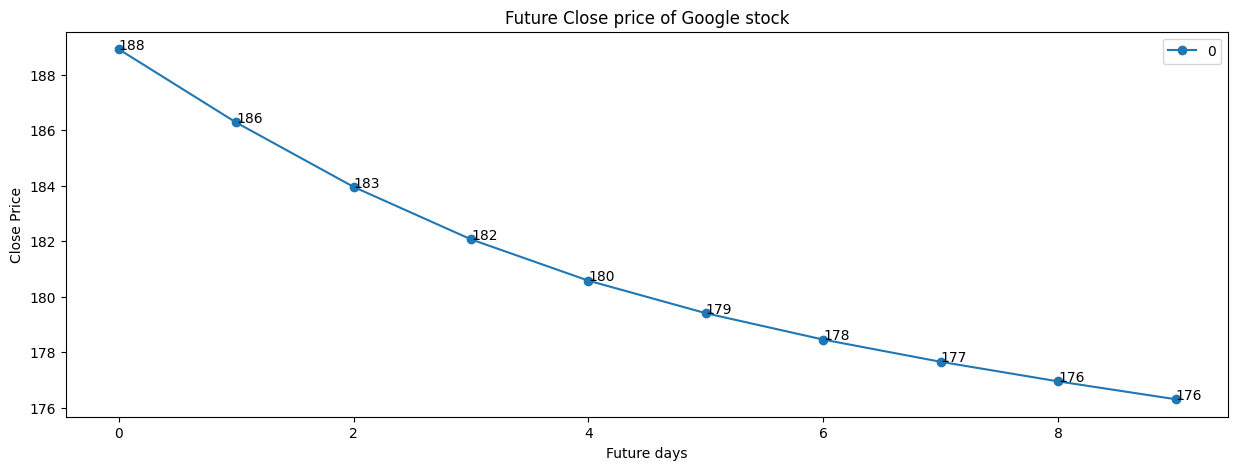

In [62]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i, future_results[i], int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close Price')
plt.title("Future Close price of Google stock")

In [63]:
model.save("Latest_stcok_price_model.keras")